In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('Test.csv')
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,現金股利,股價,董監持股(%),ROE_Test,EPS_Test,毛利率_Test
0,1101,台泥,11.00,3.69,26.64,5.87,2.34,39.85,8.38,1,1,1
1,1102,亞泥,9.81,4.05,24.67,6.29,2.77,44.05,27.37,0,1,1
2,1103,嘉泥,5.24,1.65,6.44,5.10,0.91,17.85,17.15,0,1,0
3,1104,環泥,6.66,1.82,14.24,4.79,1.04,21.70,24.16,0,1,0
4,1108,幸福,1.71,0.21,8.77,5.47,0.58,10.60,3.95,0,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   代碼        939 non-null    int64  
 1   股票        939 non-null    object 
 2   ROE_5Y    939 non-null    float64
 3   EPS_5Y    939 non-null    float64
 4   毛利率_5Y    939 non-null    float64
 5   現金殖利率     939 non-null    float64
 6   現金股利      939 non-null    float64
 7   股價        939 non-null    float64
 8   董監持股(%)   939 non-null    float64
 9   ROE_Test  939 non-null    int64  
 10  EPS_Test  939 non-null    int64  
 11  毛利率_Test  939 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 88.2+ KB


C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 27611 (\N{CJK UNIFIED IDEOGRAPH-6BDB}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  sel

C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27611 (\N{CJK UNIFIED IDEOGRAPH-6BDB}) missing from current font.
  func(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  func(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  func(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  func(*args, **kwargs)
C:\Users\bread\anaconda3\envs\Flask\lib\site-packa

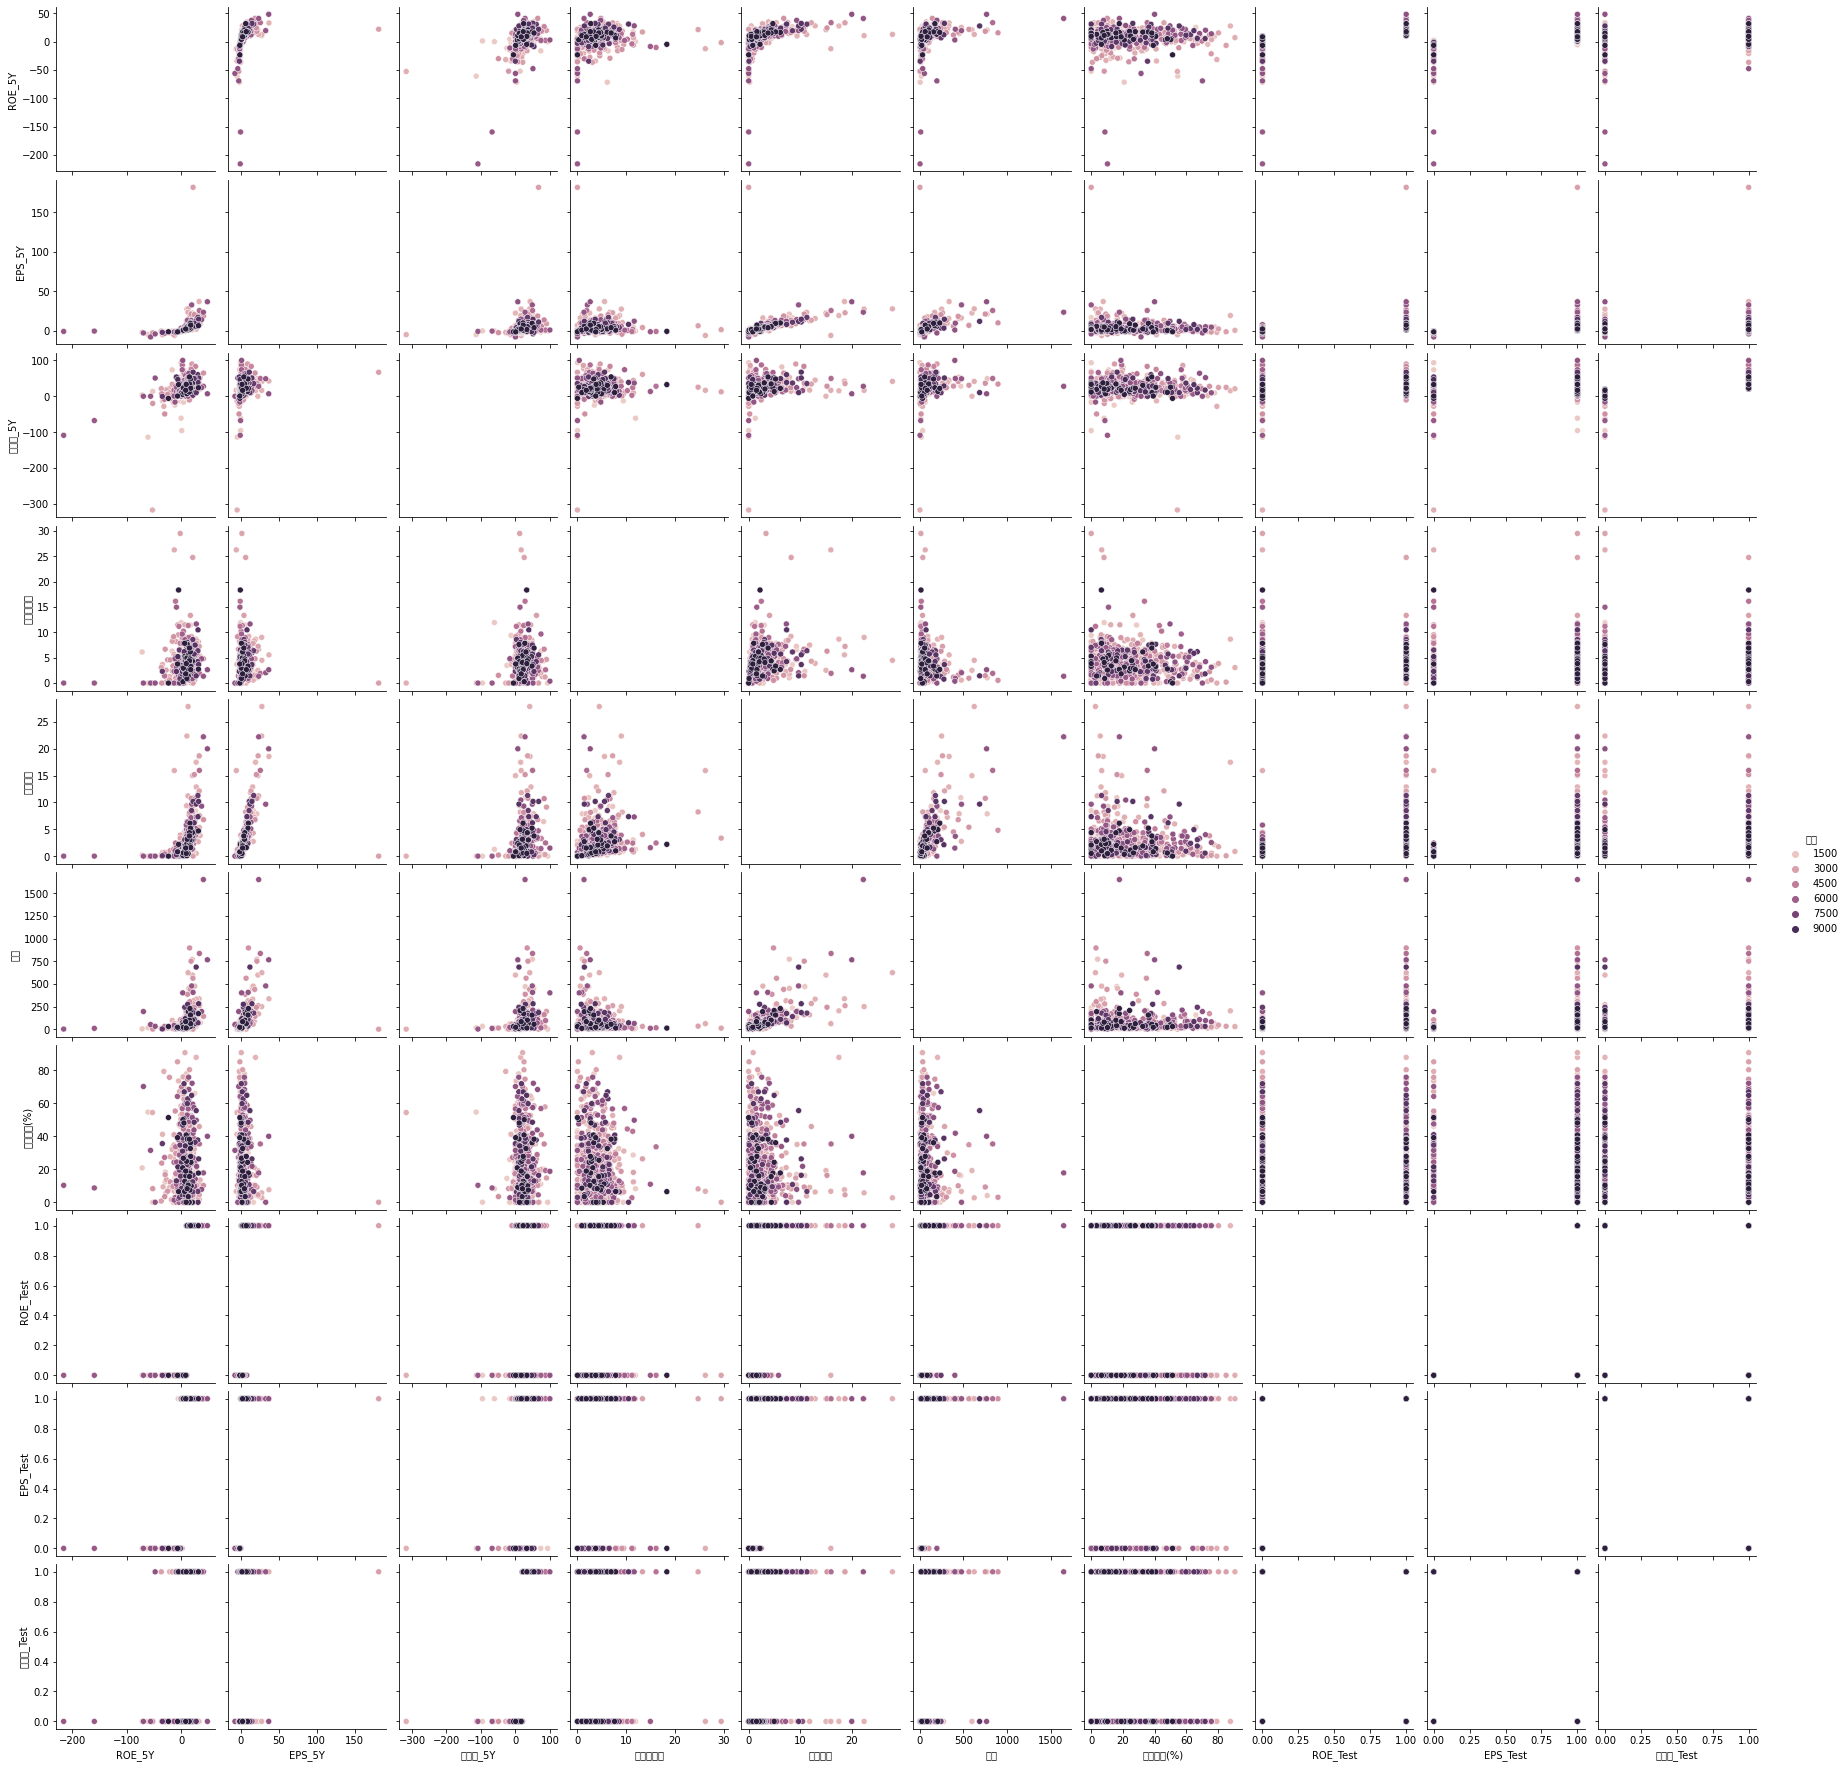

In [16]:
df.drop(['股票'], axis=1)
sns.pairplot(df,hue='代碼')

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test'], axis=1)
y = df['ROE_Test']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       109

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



In [20]:
print(confusion_matrix(y_test,predictions))

[[173   0]
 [  0 109]]


In [21]:
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

#預測測試組的駝背是否發生
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[173   0]
 [  1 108]]


In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       173
           1       1.00      0.99      1.00       109

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282

